# Case Background & Key Questions	

Flatiron Health Insurance (FHI) is a growing private healthcare insurance provider founded on the premise that using data and analytics can improve the health insurance industry by providing better care and offerings to its patients. Every year, the Center for Disease Control (CDC) conducts surveys to understand the latest demographic, health, and fitness trends. You have been tasked with analyzing the recently published results of this year's survey and providing your recommendations back to the Chief Analytics Officer and Chief Marketing Officer. You have been assigned the task of taking a first look at the data and beginning to answer several key questions:
											 								
1)  How does health status, represented by average number of days with bad physical health in the past month (PHYSHLTH), differ by state? Also provide an indication of distribution using whatever statistics you find suitable.
 												 								
2)  Digging deeper into the data, what are some factors that impact health (i.e. demographics, behaviors, previous illness, etc.)?	
						 						
To get you started, the IT department formatted the data set into a tab delimited text file for only NY, NJ, and CT (FHI’s primary markets) called `case_study.csv`. Below you will find a list of steps/questions that you will need to take in your investigation. The first part of the notebook will be focused on cleaning up your data and visualizing it.  The second part of the data set will be focused on performing statistical tests to make statements with statistical significance.  


Before you begin writing your code to clean up this data in Pandas, I necourage you to watch the following video that explains the most efficient way to clean data in pandas.

https://www.youtube.com/watch?v=nxWginnBklU&feature=youtu.be

Also, here is a link to his notebook of sample code.  
https://gitlab.com/cheevahagadog/talks-demos-n-such/tree/master/PyGotham2019

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# pd.read_csv('case_study.csv')

In [31]:
#Load our dataframe account for the index columns
df = pd.read_csv('case_study.csv', index_col=0)
pd.set_option('display.max_columns', 360)

/Users/ivan/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (171) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [32]:
df.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,PVTRESD1,COLGHOUS,STATERE1,CELLFON4,LADULT,NUMADULT,NUMMEN,NUMWOMEN,SAFETIME,CTELNUM1,CELLFON5,CADULT,PVTRESD3,CCLGHOUS,CSTATE1,LANDLINE,HHADULT,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,PERSDOC2,MEDCOST,CHECKUP1,BPHIGH4,BPMEDS,CHOLCHK1,TOLDHI2,CHOLMED1,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,ASTHNOW,CHCSCNCR,CHCOCNCR,CHCCOPD1,HAVARTH3,ADDEPEV2,CHCKIDNY,DIABETE3,DIABAGE2,LMTJOIN3,ARTHDIS2,ARTHSOCL,JOINPAI1,SEX,MARITAL,EDUCA,RENTHOM1,NUMHHOL2,NUMPHON2,CPDEMO1A,VETERAN3,EMPLOY1,CHILDREN,INCOME2,INTERNET,WEIGHT2,HEIGHT3,PREGNANT,DEAF,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,SMOKE100,SMOKDAY2,STOPSMK2,LASTSMK2,USENOW3,ECIGARET,ECIGNOW,ALCDAY5,AVEDRNK2,DRNK3GE5,MAXDRNKS,FRUIT2,FRUITJU2,FVGREEN1,FRENCHF1,POTATOE1,VEGETAB2,EXERANY2,EXRACT11,EXEROFT1,EXERHMM1,EXRACT21,EXEROFT2,EXERHMM2,STRENGTH,SEATBELT,FLUSHOT6,FLSHTMY2,PNEUVAC3,SHINGLE2,HIVTST6,HIVTSTD3,HIVRISK5,PDIABTST,PREDIAB1,INSULIN,BLDSUGAR,FEETCHK2,DOCTDIAB,CHKHEMO3,FEETCHK,EYEEXAM,DIABEYE,DIABEDU,COPDCOGH,COPDFLEM,COPDBRTH,COPDBTST,COPDSMOK,HAREHAB1,STREHAB1,CVDASPRN,ASPUNSAF,RLIVPAIN,RDUCHART,RDUCSTRK,BPEATHBT,BPSALT,BPALCHOL,BPEXER,BPEATADV,BPSLTADV,BPALCADV,BPEXRADV,BPMEDADV,BPHI2MR,ARTTODAY,ARTHWGT,ARTHEXER,ARTHEDU,ASTHMAGE,ASATTACK,ASERVIST,ASDRVIST,ASRCHKUP,ASACTLIM,ASYMPTOM,ASNOSLEP,ASTHMED3,ASINHALR,PAINACT2,QLMENTL2,QLSTRES2,QLHLTH2,SLEPTIM1,ADSLEEP,SLEPDAY1,SLEPSNO2,SLEPBRTH,MEDICARE,HLTHCVR1,DELAYMED,DLYOTHER,NOCOV121,LSTCOVRG,DRVISITS,MEDSCOS1,CARERCVD,MEDBILL1,ASBIALCH,ASBIDRNK,ASBIBING,ASBIADVC,ASBIRDUC,CNCRDIFF,CNCRAGE,CNCRTYP1,CSRVTRT2,CSRVDOC1,CSRVSUM,CSRVRTRN,CSRVINST,CSRVINSR,CSRVDEIN,CSRVCLIN,CSRVPAIN,CSRVCTL1,SSBSUGR2,SSBFRUT3,WTCHSALT,DRADVISE,MARIJANA,USEMRJN1,RSNMRJNA,PFPPRVN2,TYPCNTR7,NOBCUSE6,IMFVPLAC,HPVADVC2,HPVADSHT,TETANUS,LCSFIRST,LCSLAST,LCSNUMCG,LCSCTSCN,CAREGIV1,CRGVREL2,CRGVLNG1,CRGVHRS1,CRGVPRB2,CRGVPERS,CRGVHOUS,CRGVMST2,CRGVEXPT,CIMEMLOS,CDHOUSE,CDASSIST,CDHELP,CDSOCIAL,CDDISCUS,EMTSUPRT,LSATISFY,SDHBILLS,SDHMOVE,HOWSAFE1,SDHFOOD,SDHMEALS,SDHMONEY,SDHSTRES,SXORIENT,TRNSGNDR,FIREARM4,GUNLOAD,LOADULK2,RCSGENDR,RCSRLTN2,CASTHDX2,CASTHNO2,QSTVER,QSTLANG,MSCODE,_STSTR,_STRWT,_RAWRAKE,_WT2RAKE,_IMPRACE,_CHISPNC,_CRACE1,_CPRACE,_CLLCPWT,_DUALUSE,_DUALCOR,_LLCPWT2,_LLCPWT,_RFHLTH,_PHYS14D,_MENT14D,_HCVU651,_RFHYPE5,_CHOLCH1,_RFCHOL1,_MICHD,_LTASTH1,_CASTHM1,_ASTHMS1,_DRDXAR1,_LMTACT1,_LMTWRK1,_LMTSCL1,_PRACE1,_MRACE1,_HISPANC,_RACE,_RACEG21,_RACEGR3,_RACE_G1,_AGEG5YR,_AGE65YR,_AGE80,_AGE_G,HTIN4,HTM4,WTKG3,_BMI5,_BMI5CAT,_RFBMI5,_CHLDCNT,_EDUCAG,_INCOMG,_SMOKER3,_RFSMOK3,_ECIGSTS,_CURECIG,DRNKANY5,DROCDY3_,_RFBING5,_DRNKWEK,_RFDRHV5,FTJUDA2_,FRUTDA2_,GRENDA1_,FRNCHDA_,POTADA1_,VEGEDA2_,_MISFRT1,_MISVEG1,_FRTRES1,_VEGRES1,_FRUTSU1,_VEGESU1,_FRTLT1A,_VEGLT1A,_FRT16A,_VEG23A,_FRUITE1,_VEGETE1,_TOTINDA,METVL11_,METVL21_,MAXVO2_,FC60_,ACTIN11_,ACTIN21_,PADUR1_,PADUR2_,PAFREQ1_,PAFREQ2_,_MINAC11,_MINAC21,STRFREQ_,PAMISS1_,PAMIN11_,PAMIN21_,PA1MIN_,PAVIG11_,PAVIG21_,PA1VIGM_,_PACAT1,_PAINDX1,_PA150R2,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
49938,9.0,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,2.0,1.0,NaN,2.0,2.0,2.0,3.0,88.0,2.0,88.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,1.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,2.0,5.0,6.0,2.0,NaN,NaN,NaN,2.0,1.0,88.0,7.0,1.0,160.0,502.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,3.0,2.0,NaN,101.0,5.0,88.0,2.0,301.0,202.0,305.0,202.0,303.0,306.0,1.0,67.0,203.0,100.0,55.0,201.0,100.0,204.0,1.0,2.0,NaN,2.0,NaN,1.0,42016.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [33]:
df.rename(columns={'_STATE': 'state' ,'PHYSHLTH': 'physical_health', 'SMOKDAY2': 'smoking'}, inplace= True)    # renaming 2 columns

In [34]:
conditions = [ df['state'] == 9. ,df['state'] == 34. ,df['state'] == 36.]
choises = ['Connecticut', 'New Jersey', 'New York']
df['state'] = np.select(conditions, choises, default = 'NA')

In [35]:
df.head()

,state,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,PVTRESD1,COLGHOUS,STATERE1,CELLFON4,LADULT,NUMADULT,NUMMEN,NUMWOMEN,SAFETIME,CTELNUM1,CELLFON5,CADULT,PVTRESD3,CCLGHOUS,CSTATE1,LANDLINE,HHADULT,GENHLTH,physical_health,MENTHLTH,POORHLTH,HLTHPLN1,PERSDOC2,MEDCOST,CHECKUP1,BPHIGH4,BPMEDS,CHOLCHK1,TOLDHI2,CHOLMED1,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,ASTHNOW,CHCSCNCR,CHCOCNCR,CHCCOPD1,HAVARTH3,ADDEPEV2,CHCKIDNY,DIABETE3,DIABAGE2,LMTJOIN3,ARTHDIS2,ARTHSOCL,JOINPAI1,SEX,MARITAL,EDUCA,RENTHOM1,NUMHHOL2,NUMPHON2,CPDEMO1A,VETERAN3,EMPLOY1,CHILDREN,INCOME2,INTERNET,WEIGHT2,HEIGHT3,PREGNANT,DEAF,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,SMOKE100,smoking,STOPSMK2,LASTSMK2,USENOW3,ECIGARET,ECIGNOW,ALCDAY5,AVEDRNK2,DRNK3GE5,MAXDRNKS,FRUIT2,FRUITJU2,FVGREEN1,FRENCHF1,POTATOE1,VEGETAB2,EXERANY2,EXRACT11,EXEROFT1,EXERHMM1,EXRACT21,EXEROFT2,EXERHMM2,STRENGTH,SEATBELT,FLUSHOT6,FLSHTMY2,PNEUVAC3,SHINGLE2,HIVTST6,HIVTSTD3,HIVRISK5,PDIABTST,PREDIAB1,INSULIN,BLDSUGAR,FEETCHK2,DOCTDIAB,CHKHEMO3,FEETCHK,EYEEXAM,DIABEYE,DIABEDU,COPDCOGH,COPDFLEM,COPDBRTH,COPDBTST,COPDSMOK,HAREHAB1,STREHAB1,CVDASPRN,ASPUNSAF,RLIVPAIN,RDUCHART,RDUCSTRK,BPEATHBT,BPSALT,BPALCHOL,BPEXER,BPEATADV,BPSLTADV,BPALCADV,BPEXRADV,BPMEDADV,BPHI2MR,ARTTODAY,ARTHWGT,ARTHEXER,ARTHEDU,ASTHMAGE,ASATTACK,ASERVIST,ASDRVIST,ASRCHKUP,ASACTLIM,ASYMPTOM,ASNOSLEP,ASTHMED3,ASINHALR,PAINACT2,QLMENTL2,QLSTRES2,QLHLTH2,SLEPTIM1,ADSLEEP,SLEPDAY1,SLEPSNO2,SLEPBRTH,MEDICARE,HLTHCVR1,DELAYMED,DLYOTHER,NOCOV121,LSTCOVRG,DRVISITS,MEDSCOS1,CARERCVD,MEDBILL1,ASBIALCH,ASBIDRNK,ASBIBING,ASBIADVC,ASBIRDUC,CNCRDIFF,CNCRAGE,CNCRTYP1,CSRVTRT2,CSRVDOC1,CSRVSUM,CSRVRTRN,CSRVINST,CSRVINSR,CSRVDEIN,CSRVCLIN,CSRVPAIN,CSRVCTL1,SSBSUGR2,SSBFRUT3,WTCHSALT,DRADVISE,MARIJANA,USEMRJN1,RSNMRJNA,PFPPRVN2,TYPCNTR7,NOBCUSE6,IMFVPLAC,HPVADVC2,HPVADSHT,TETANUS,LCSFIRST,LCSLAST,LCSNUMCG,LCSCTSCN,CAREGIV1,CRGVREL2,CRGVLNG1,CRGVHRS1,CRGVPRB2,CRGVPERS,CRGVHOUS,CRGVMST2,CRGVEXPT,CIMEMLOS,CDHOUSE,CDASSIST,CDHELP,CDSOCIAL,CDDISCUS,EMTSUPRT,LSATISFY,SDHBILLS,SDHMOVE,HOWSAFE1,SDHFOOD,SDHMEALS,SDHMONEY,SDHSTRES,SXORIENT,TRNSGNDR,FIREARM4,GUNLOAD,LOADULK2,RCSGENDR,RCSRLTN2,CASTHDX2,CASTHNO2,QSTVER,QSTLANG,MSCODE,_STSTR,_STRWT,_RAWRAKE,_WT2RAKE,_IMPRACE,_CHISPNC,_CRACE1,_CPRACE,_CLLCPWT,_DUALUSE,_DUALCOR,_LLCPWT2,_LLCPWT,_RFHLTH,_PHYS14D,_MENT14D,_HCVU651,_RFHYPE5,_CHOLCH1,_RFCHOL1,_MICHD,_LTASTH1,_CASTHM1,_ASTHMS1,_DRDXAR1,_LMTACT1,_LMTWRK1,_LMTSCL1,_PRACE1,_MRACE1,_HISPANC,_RACE,_RACEG21,_RACEGR3,_RACE_G1,_AGEG5YR,_AGE65YR,_AGE80,_AGE_G,HTIN4,HTM4,WTKG3,_BMI5,_BMI5CAT,_RFBMI5,_CHLDCNT,_EDUCAG,_INCOMG,_SMOKER3,_RFSMOK3,_ECIGSTS,_CURECIG,DRNKANY5,DROCDY3_,_RFBING5,_DRNKWEK,_RFDRHV5,FTJUDA2_,FRUTDA2_,GRENDA1_,FRNCHDA_,POTADA1_,VEGEDA2_,_MISFRT1,_MISVEG1,_FRTRES1,_VEGRES1,_FRUTSU1,_VEGESU1,_FRTLT1A,_VEGLT1A,_FRT16A,_VEG23A,_FRUITE1,_VEGETE1,_TOTINDA,METVL11_,METVL21_,MAXVO2_,FC60_,ACTIN11_,ACTIN21_,PADUR1_,PADUR2_,PAFREQ1_,PAFREQ2_,_MINAC11,_MINAC21,STRFREQ_,PAMISS1_,PAMIN11_,PAMIN21_,PA1MIN_,PAVIG11_,PAVIG21_,PA1VIGM_,_PACAT1,_PAINDX1,_PA150R2,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
49938,Connecticut,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,2.0,1.0,NaN,2.0,2.0,2.0,3.0,88.0,2.0,88.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,1.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,2.0,5.0,6.0,2.0,NaN,NaN,NaN,2.0,1.0,88.0,7.0,1.0,160.0,502.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,3.0,2.0,NaN,101.0,5.0,88.0,2.0,301.0,202.0,305.0,202.0,303.0,306.0,1.0,67.0,203.0,100.0,55.0,201.0,100.0,204.0,1.0,2.0,NaN,2.0,NaN,1.0,42016.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

## Subset your dataframe to only include the states in the tri-state area (NJ, CT, NY)

In [36]:

# df[df['_STATE'].isin([9,34,36])]

Now check to see how large our subset df.

**PHYSHLTH** is the column we are interested in for this analysis, so let's start to investigate the column. Since we have a data cookbook, a.k.a. data dictionary) we want to start there before looking at the code.

In [37]:
df['physical_health'].describe()

count    34545.000000
mean        60.213403
std         37.504566
min          1.000000
25%         15.000000
50%         88.000000
75%         88.000000
max         99.000000
Name: physical_health, dtype: float64

## 1. Handle the non-normal values

As you can see from the data dictionary, there are a number of responses that are coded with values that could throw off our descriptive statistics.  Let's clean up by mapping the responses to a more appropriate value, and handling any missing values.  

In [38]:
#df[(df.physical_health != 99.0) & (df.physical_health != 77.0)]

In [357]:
df.drop(df[df['physical_health'] == 99.0 ].index, inplace=True)   # Delete values where patient - 'Refused'
df.drop(df[df['physical_health'] == 77.0 ].index, inplace=True)   # Delete values where patient - 'Don't know/Not Sure
df.physical_health = np.where(df.physical_health == 88.0, 0, df.physical_health)
df.physical_health.shape

(13294,)

In [355]:
df.loc[df['physical_health'] == 99.0 ].index

Int64Index([], dtype='int64')

## 2. Generate the descriptive statistics

Now that our target variable is cleaned up lets calculate the descriptive statistics, generate a graph that quickly shows those statistics, and generate a graph shows the distribution of the data.

In [40]:
len(df.physical_health.unique())

31

In [41]:
# descriptive statistics
df.physical_health.describe()

count    33747.000000
mean         4.085341
std          8.513293
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max         30.000000
Name: physical_health, dtype: float64

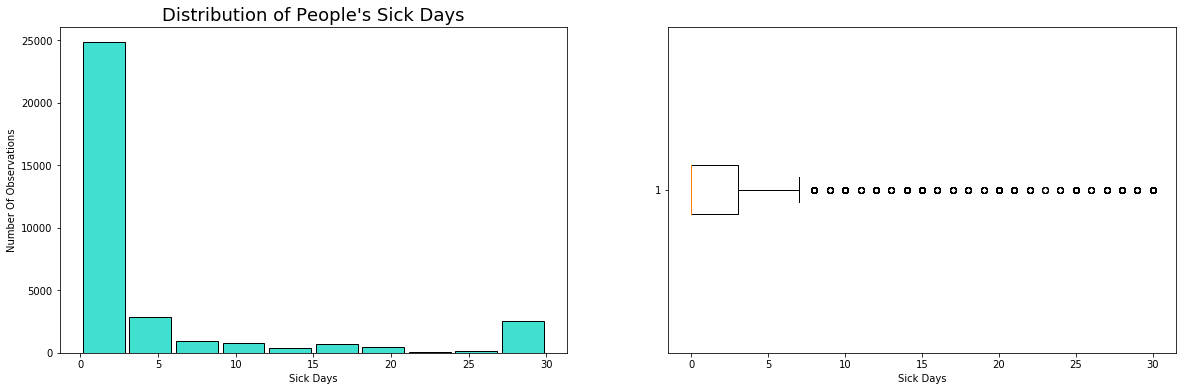

In [42]:
fig = plt.figure(figsize=(20,6))

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.hist(df.physical_health, color='turquoise', rwidth = 0.9, edgecolor= 'black')
ax1.set_title("Distribution of People's Sick Days", size= 18)
ax1.set_xlabel('Sick Days', size=10)
ax1.set_ylabel('Number Of Observations', size=10)

ax2.boxplot(df.physical_health, vert = False)
ax2.set_xlabel('Sick Days', size=10)
plt.show()

## 3. Generate a graphic that compares the average number of sick days for each state. 

In [43]:
# code to calculate the average number of sick days by state
state_grouped = df.groupby('state')['physical_health'].mean()
state_grouped

state
Connecticut    3.688562
New Jersey     4.380957
New York       4.148030
Name: physical_health, dtype: float64

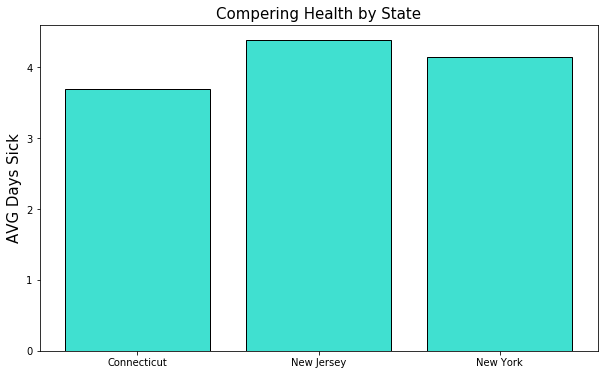

In [44]:
# code to graph those averages using matplotlib
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(state_grouped.index ,state_grouped.values, color='turquoise', edgecolor= 'black', align='center')
ax.set_title('Compering Health by State', size=15)
ax.set_ylabel('AVG Days Sick', size=15)
plt.show()

In [141]:
ct = df.loc[ df['state'] == 'Connecticut' , ['physical_health']]
nj = df.loc[ df['state'] == 'New Jersey' , ['physical_health']]
ny = df.loc[ df['state'] == 'New York' , ['physical_health']]

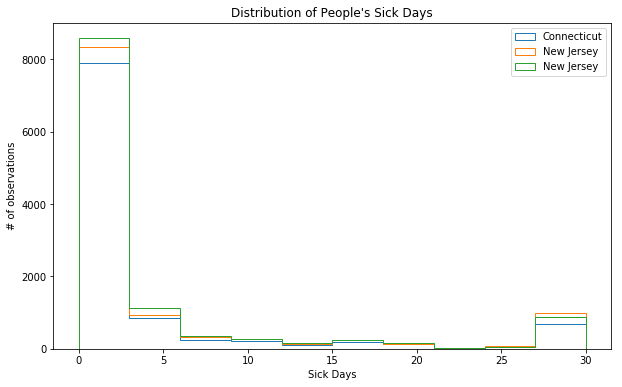

In [46]:
#graphic showing the histogram of data
fig, ax = plt.subplots(figsize=(10,6))

ax.hist(ct.values , label="Connecticut", histtype='step')
ax.hist(nj.values, label="New Jersey", histtype='step')
ax.hist(ny.values, label="New Jersey", histtype='step')

ax.set_xlabel('Sick Days')
ax.set_ylabel('# of observations')
ax.set_title("Distribution of People's Sick Days")
ax.legend()
plt.show()


## 4. Turn the number of sick days into a classification of of chronically sick people.  

Chronically sick people account for a significant proportion of the costs for health insurers. If we can identify what leads people to be chronically sick, we can address them with specific treatments.



In [47]:
# code to create new colum for chronically sick
df['chron'] = np.where(df['physical_health']>20, 1, 0)

In [48]:
df.chron.value_counts()

0    30936
1     2811
Name: chron, dtype: int64

## 5. Create a graphic that compares the percentage of people labeled as 'sick' in each state. 

In [49]:
# code to calculate averages per state
chron_sick=df.groupby('state')['chron'].value_counts(normalize=True).loc[:,1]*100
chron_sick

state
Connecticut    7.346586
New Jersey     9.451911
New York       8.108791
Name: chron, dtype: float64

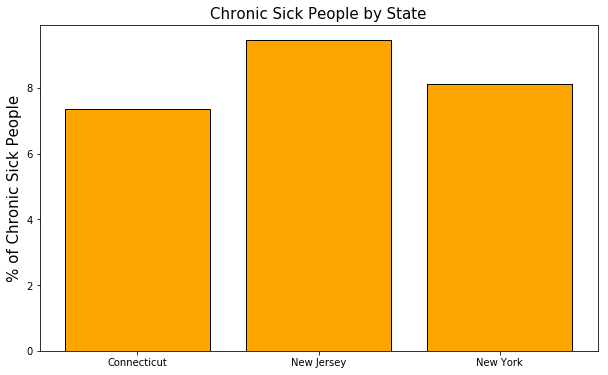

In [50]:
# create graphic to compare chronically sick by state
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(chron_sick.index ,chron_sick.values, color='orange', edgecolor= 'black', align='center')
ax.set_title('Chronic Sick People by State', size=15)
ax.set_ylabel('% of Chronic Sick People', size=15)
plt.show()

## 6. Independent Variables (categorical)

Does smoking affect the number of days people feel physically ill? 
Let's take the column `SMOKDAY2` and start to prepare it so that we can see how it is possibly correlated to `PHYSHLTH`. When cleaning this data you will find that many respondents were not asked that question. read the codebook to understand why, and use that information when cleaning up your data. I.E, you will need to process two columns in order to create a new column of smokers.

1. Clean up the values.
2. Calculate the descriptive statistics of the variable.
3. Generate a histogram for the variable.
4. Generate graphics that show how the responses to this variable might differ by state.
5. Generate a graphic that compares the physical health of the different groups of 'smokers'.

In [51]:
df = df[~df.smoking.isna()]  # droping NaN from smoking
conditions = [ df['smoking'] == 1.0 ,df['smoking'] == 2.0 ,df['smoking'] == 3.0, df['smoking'] == 7.0, df['smoking'] == 9.0]
choises = ['Everyday', 'Some Days', 'Non-Smoker', "Dont'know", 'Refused']
df['smoking'] = np.select(conditions, choises)

In [52]:
pct_smoking = df['smoking'].value_counts(normalize=True)*100
pct_smoking

Non-Smoker    70.493020
Everyday      19.386694
Some Days      9.919810
Refused        0.155925
Dont'know      0.044550
Name: smoking, dtype: float64

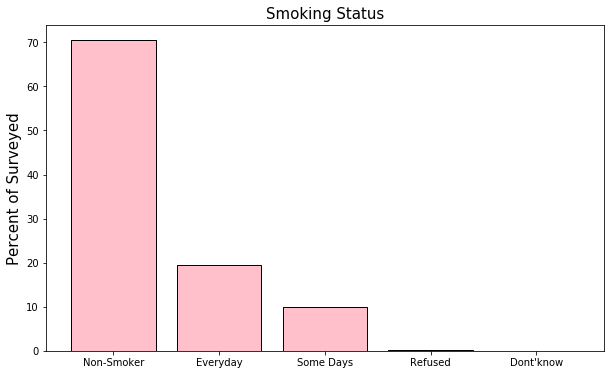

In [60]:
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(pct_smoking.index ,pct_smoking.values, color='pink', edgecolor= 'black', align='center')
ax.set_title('Smoking Status', size=15)
ax.set_ylabel('Percent of Surveyed', size=15)
plt.show()

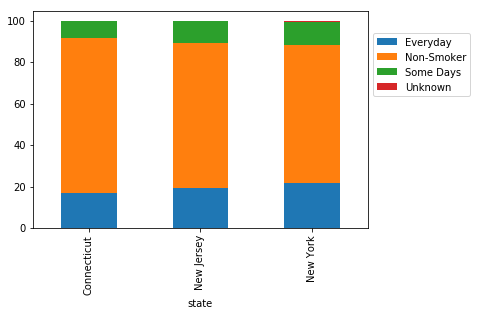

In [347]:
smk_groupped = df.groupby(['state'])['smoking'].value_counts(normalize=True)*100

unst = smk_groupped.unstack()
unst['Unknown'] = unst['Refused']+ unst["Dont'know"]
unst.drop(columns=["Dont'know",'Refused'],inplace=True)
unst.plot(kind = 'bar', stacked = True )
plt.legend(loc='center left', bbox_to_anchor=(1, 0.75))
plt.show()

In [350]:
smk_groupped.unstack()

smoking,Dont'know,Everyday,Non-Smoker,Refused,Some Days
state,,,,,
Connecticut,0.047939,16.754554,75.023969,0.071908,8.101630
New Jersey,NaN,19.523393,70.069961,0.043725,10.362921
New York,0.043975,21.635884,66.864556,0.285840,11.169745


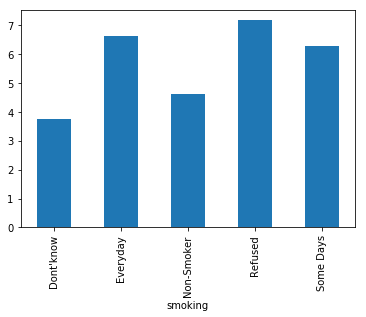

In [353]:
df.groupby('smoking')['physical_health'].mean().plot(kind='bar')
plt.show()

## 7. Independent Variables (continuous):

Does the amount of days a person drinks affect the number of days they feel physically ill?
To investigate this, let's look at a continuous variable (ALCDAY5) and see how that might impact a person's health. 

1. Clean up the values.
2. Calculate the descriptive statistics of the variable.
3. Generate a histogram for the variable.
4. Generate graphics that show how the responses to this variable might differ by state.
5. Calculate the correlation coefficient between `PHYSHLTH` and `ALCDAY5`.
5. Generate a graphic that shows the possible relationship between `PHYSHLTH` and `ALCDAY5`.

In [333]:
df = df[(df['ALCDAY5'] != 777.0) & (df['ALCDAY5'] != 999.0)]
df['ALCDAY5'].value_counts()

888.0    4891
201.0    1145
202.0     917
230.0     743
101.0     635
102.0     520
203.0     509
205.0     473
204.0     450
107.0     424
103.0     369
210.0     341
220.0     303
215.0     260
104.0     175
105.0     168
208.0     161
206.0     156
225.0     122
207.0     104
106.0      59
212.0      57
228.0      30
214.0      23
229.0      17
227.0      10
209.0       9
216.0       9
226.0       9
221.0       9
224.0       6
218.0       6
222.0       4
213.0       4
211.0       3
217.0       3
223.0       2
219.0       1
Name: ALCDAY5, dtype: int64

In [336]:
# code here to clean up the ALCDAY5 responses
def cleaning(v):
    if v in [101.0, 204.0]:
        return 4
    elif v in [102.0, 208.0]:
        return 8
    elif v in [103.0, 212.0]:
        return 12
    elif v in [104.0, 216.0]:
        return 16
    elif v in [105.0, 220.0]:
        return 20
    elif v in [106.0, 224.0]:
        return 24
    elif v in [107.0, 28.0]:b
        return 28
    
    
df1 = df['ALCDAY5'].map(cleaning)
df1

49942     4.0
49944     NaN
49946     NaN
49951     NaN
49954     NaN
         ... 
303768    NaN
303769    8.0
303773    8.0
303774    NaN
303776    4.0
Name: ALCDAY5, Length: 13294, dtype: float64

In [73]:
#descriptive statistics of cleaned data

count    31532.000000
mean         5.504455
std          8.450005
min          0.000000
25%          0.000000
50%          2.000000
75%          7.000000
max         30.416680
Name: alcohol, dtype: float64

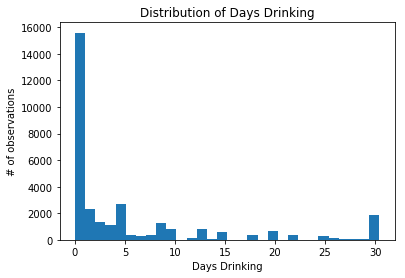

In [75]:
# graphic showing the histogram of data


In [76]:
# code to calculate averages per state


_STATE
9.0     6.208564
34.0    5.068090
36.0    5.309619
Name: alcohol, dtype: float64

In [83]:
# Code to calculate correlation of between number of dirnks of number of days physically ill

PHYSHLTH    1.000000
alcohol    -0.091016
Name: PHYSHLTH, dtype: float64

## 8. Statistical Inference


- Create a 95% confidence interval for the population mean of physically ill days.

-  Create a 95% confidence interval for the true proportion of chronically sick people.

## 9. Hypothesis Tests 

**For the follwing questions that require hypothesis tests, you must complete the following steps for each question:**

*1. Write down the null and alternative hypothesis you are testing.* 

*2. Select the appropriate test and calculate the test statistic and P-values.*

*3. Determine the critical value for the 95% confidence interval.*

*4. Evaluate the test statistic agains the critical value.*

*5. Determine if you reject or fail to reject the null hypothesis and write a sentence explaining the results of your hypothesis test.*  

### 9.A The following questions are regarding the `PHYSHLTH` variable. 
1. What is the probability of getting this sample mean for days physically ill, if the population mean is 4?
2. Is there a statistically significant difference between men and women in the number of days a person feels phsyically ill?
3. Perform a statistical test to determine if there statistically significant difference is physical health of people from the three states. 


### 9.B The following questions are regarding the  `CHRONIC` variable.
1. What is the probability of drawing this sample proportion if chronically true population proportion is 0.10?
2. Is there a statistically significant difference in the percentage of men and women who are chronically sick?
3. Perform a statistical test to determine if there is a statistically significant difference in cproportion of people with chronic health issues from the three states.

# 10. Independent Investigation

Now that you have invesitgated physical health and chronic sickness and their relationships with states and gender, you will conduct a similar investigation with variables of your choosing. 


**Select a continuous variable from the survey questions as you dependent variable and perform the following:**
  1. Determine the sample mean and sample standard deviation
  2. Create a confidence interval for a population mean.
  3. Perform a two-sample test of means for gender.
  4. Perform a one-way ANOVA using your categorical independent variable.

**Select/create a binary variable from the survey questions as you dependent variable and perform the following:**
  1. Create a confidence interval for a population proportion.
  2. Perform a two proportions z-test using gender.
  3. Perform a Chi-Square test using your categorical independent variable.